# 06 PCA

In [ ]:
# Setup
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

---

## 3. Riduzione della Dimensionalita

La **riduzione della dimensionalita** trasforma dati ad alta dimensionalita in uno spazio a dimensionalita ridotta, preservando le informazioni piu importanti.

### Perche ridurre la dimensionalita?

1. **Visualizzazione**: proiettare dati in 2D o 3D per esplorazione
2. **Curse of Dimensionality**: in alta dimensionalita, i punti diventano equidistanti
3. **Riduzione del rumore**: eliminare feature irrilevanti
4. **Preprocessing**: ridurre costi computazionali per modelli successivi
5. **Feature extraction**: creare nuove feature piu informative

### Tecniche lineari vs non-lineari

| Tipo | Tecniche | Caratteristiche |
|------|----------|----------------|
| **Lineare** | PCA, LDA | Veloci, interpretabili, preservano struttura globale |
| **Non-lineare** | t-SNE, UMAP | Preservano struttura locale, migliori per visualizzazione |

### 3.1 Principal Component Analysis (PCA)

**PCA** e la tecnica di riduzione dimensionale piu utilizzata. Trova le direzioni di massima varianza nei dati (componenti principali) e proietta i dati su queste direzioni.

#### Matematica di PCA

1. Centrare i dati: $X_{centered} = X - \bar{X}$
2. Calcolare la matrice di covarianza: $C = \frac{1}{n-1} X_{centered}^T X_{centered}$
3. Calcolare autovalori e autovettori di $C$
4. Ordinare per autovalore decrescente
5. Proiettare: $X_{new} = X_{centered} \cdot V_k$ (dove $V_k$ sono i primi $k$ autovettori)

La **varianza spiegata** indica quanta informazione e preservata:

$$\text{Varianza spiegata}_i = \frac{\lambda_i}{\sum_j \lambda_j}$$

Dimensioni originali: (1797, 64)
Ogni immagine e 8x8 pixels


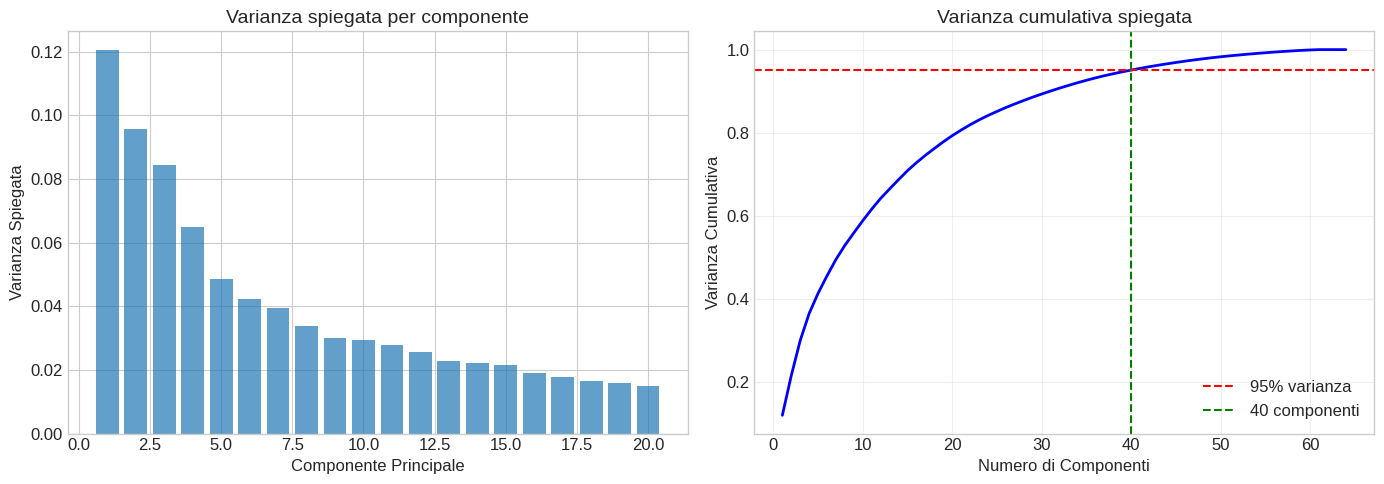


Componenti necessarie per 95% della varianza: 40
Riduzione dimensionalita: 64 -> 40 (62.5%)


In [9]:
# SEZIONE 3.1: PCA
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Caricamento dataset MNIST (cifre scritte a mano)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Dimensioni originali: {X_digits.shape}")
print(f"Ogni immagine e {int(np.sqrt(X_digits.shape[1]))}x{int(np.sqrt(X_digits.shape[1]))} pixels")

# Standardizzazione
scaler_pca = StandardScaler()
X_digits_scaled = scaler_pca.fit_transform(X_digits)

# PCA con tutte le componenti per analizzare la varianza
pca_full = PCA()
pca_full.fit(X_digits_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualizzazione varianza spiegata
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varianza spiegata per componente
axes[0].bar(range(1, 21), pca_full.explained_variance_ratio_[:20], alpha=0.7)
axes[0].set_xlabel('Componente Principale', fontsize=12)
axes[0].set_ylabel('Varianza Spiegata', fontsize=12)
axes[0].set_title('Varianza spiegata per componente', fontsize=14)

# Varianza cumulativa
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% varianza')
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
axes[1].axvline(x=n_components_95, color='green', linestyle='--',
                label=f'{n_components_95} componenti')
axes[1].set_xlabel('Numero di Componenti', fontsize=12)
axes[1].set_ylabel('Varianza Cumulativa', fontsize=12)
axes[1].set_title('Varianza cumulativa spiegata', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nComponenti necessarie per 95% della varianza: {n_components_95}")
print(f"Riduzione dimensionalita: {X_digits.shape[1]} -> {n_components_95} ({100*n_components_95/X_digits.shape[1]:.1f}%)")

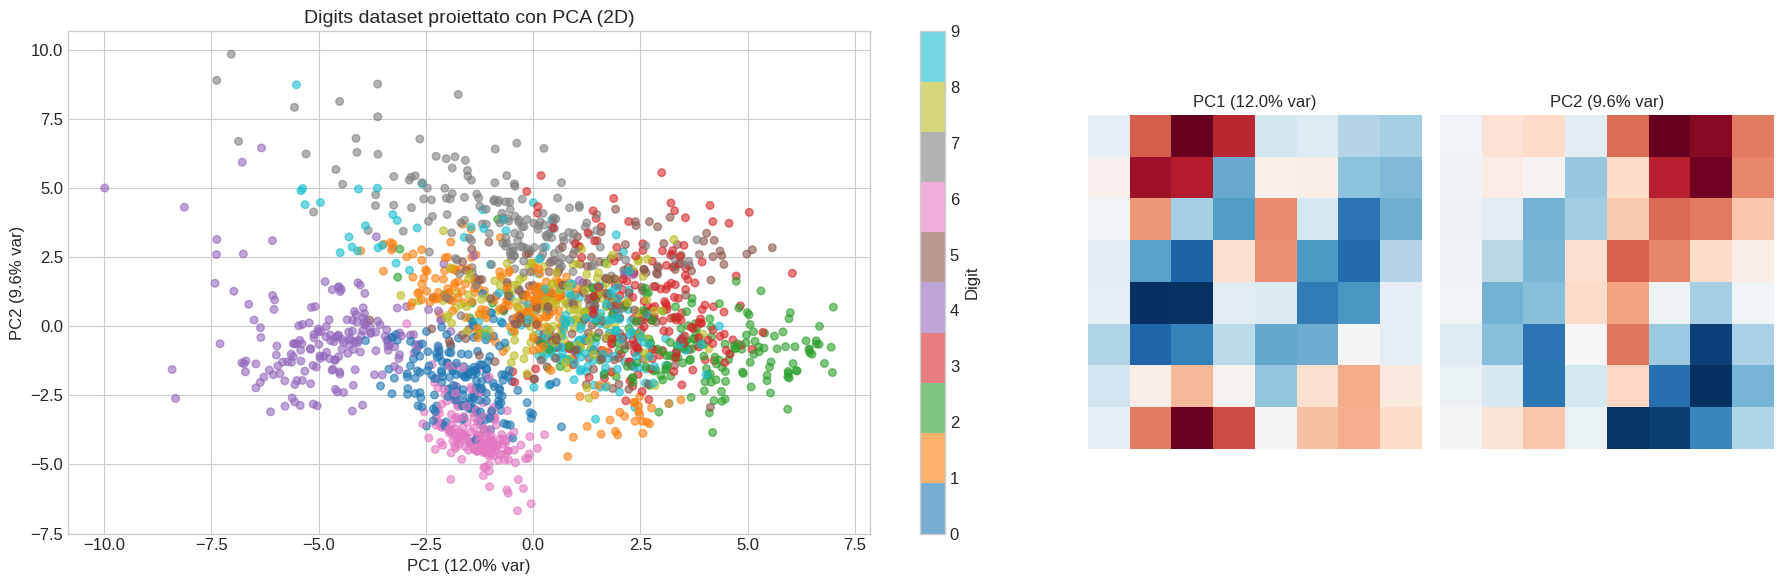

Varianza totale spiegata dalle prime 2 componenti: 21.6%


In [10]:
# Visualizzazione 2D con PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ricaricamento dati (incapsulamento)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

scaler_pca2d = StandardScaler()
X_digits_scaled = scaler_pca2d.fit_transform(X_digits)

# PCA a 2 componenti per visualizzazione
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_digits_scaled)

# Visualizzazione con layout a 3 colonne
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         gridspec_kw={'width_ratios': [3, 1, 1]})

# Scatter plot colorato per classe
scatter = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                          c=y_digits, cmap='tab10', alpha=0.6, s=30)
plt.colorbar(scatter, ax=axes[0], label='Digit')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% var)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% var)', fontsize=12)
axes[0].set_title('Digits dataset proiettato con PCA (2D)', fontsize=14)

# Visualizzazione delle prime 2 componenti principali come immagini
for i, (ax, comp, var) in enumerate(zip(
    axes[1:],
    pca_2d.components_[:2],
    pca_2d.explained_variance_ratio_[:2]
)):
    ax.imshow(comp.reshape(8, 8), cmap='RdBu_r')
    ax.set_title(f'PC{i+1} ({var*100:.1f}% var)', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Varianza totale spiegata dalle prime 2 componenti: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%")

**Osservazioni importanti su PCA**

- Sempre standardizzare i dati prima di PCA
- Le componenti sono ordinate per varianza spiegata
- PCA e invertibile: possiamo ricostruire i dati originali (con perdita)
- Le componenti sono ortogonali tra loro

**Quando usare PCA**

- Riduzione dimensionale per preprocessing
- Rimozione rumore
- Compressione dati
- Quando le relazioni sono approssimativamente lineari